In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from termcolor import colored

In [28]:
size = 10000

# stopnie swobody
deg = [1, 2, 3, 5, 10, 20]

# Tworze sobie 4 rozne rozklady Student-t:

Student_dict = {
    "Student_1":np.random.standard_t(deg[0], size=size),
    "Student_2":np.random.standard_t(deg[1], size=size),
    "Student_3":np.random.standard_t(deg[2], size=size),
    "Student_5":np.random.standard_t(deg[3], size=size),
    "Student_10":np.random.standard_t(deg[4], size=size),
    "Student_20":np.random.standard_t(deg[5], size=size)
}

# i robie z nich dataframe:
dataFrameStudent = pd.DataFrame.from_dict(Student_dict)

# i wykonuje operacje melted:
meltedStudent = dataFrameStudent.melt()

# Teraz mam przygotowane dane wyswietlenia histogramow

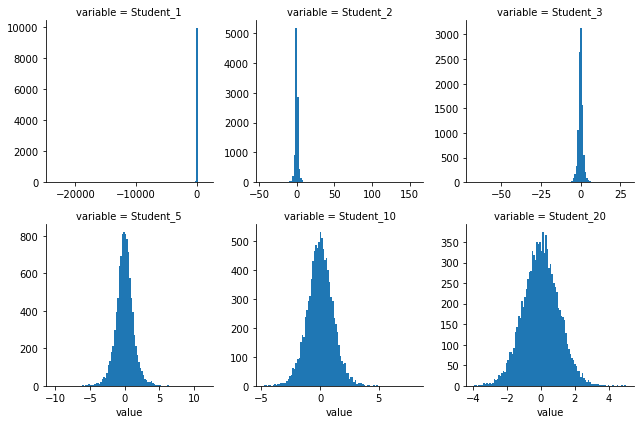

In [29]:
# Wygenerowanie histogramow rozkladow gamma:

Visualization = sn.FacetGrid(meltedStudent, col="variable", sharex=False, sharey=False, col_wrap=3)
Visualization.map(plt.hist, "value", cumulative=False, bins=100)
    

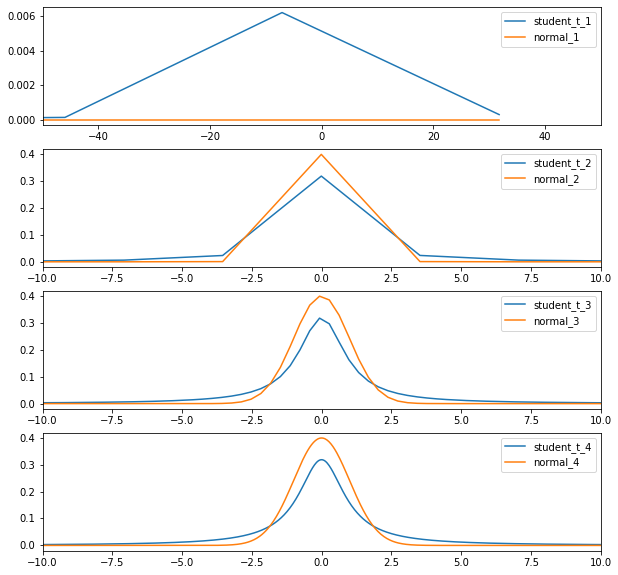

In [38]:
# Cauchy z polecenia:
import scipy.stats as stats

no_of_samples = [10, 100, 1000, 10000]

plt.figure(figsize=(10,10))

x_axis_1 = np.linspace(stats.t.ppf(0.001, deg[0]), stats.t.ppf(0.99, deg[0]), no_of_samples[0])
x_axis_2 = np.linspace(stats.t.ppf(0.001, deg[0]), stats.t.ppf(0.99, deg[0]), no_of_samples[1])
x_axis_3 = np.linspace(stats.t.ppf(0.001, deg[0]), stats.t.ppf(0.99, deg[0]), no_of_samples[2])
x_axis_4 = np.linspace(stats.t.ppf(0.001, deg[0]), stats.t.ppf(0.99, deg[0]), no_of_samples[3])

student_t_1 = stats.t.pdf(x_axis_1, deg[0])
student_t_2 = stats.t.pdf(x_axis_2, deg[0])
student_t_3 = stats.t.pdf(x_axis_3, deg[0])
student_t_4 = stats.t.pdf(x_axis_4, deg[0])

normal_1 = stats.norm.pdf(x_axis_1)
normal_2 = stats.norm.pdf(x_axis_2)
normal_3 = stats.norm.pdf(x_axis_3)
normal_4 = stats.norm.pdf(x_axis_4)

plt.subplot(4,1,1)
plt.plot(x_axis_1, student_t_1, label="student_t_1")
plt.plot(x_axis_1, normal_1, label="normal_1")
plt.legend()
plt.xlim(left=-50, right=50)

plt.subplot(4,1,2)
plt.plot(x_axis_2, student_t_2, label="student_t_2")
plt.plot(x_axis_2, normal_2, label="normal_2")
plt.legend()
plt.xlim(left=-10, right=10)

plt.subplot(4,1,3)
plt.plot(x_axis_3, student_t_3, label="student_t_3")
plt.plot(x_axis_3, normal_3, label="normal_3")
plt.legend()
plt.xlim(left=-10, right=10)

plt.subplot(4,1,4)
plt.plot(x_axis_4, student_t_4, label="student_t_4")
plt.plot(x_axis_4, normal_4, label="normal_4")
plt.legend()
plt.xlim(left=-10, right=10)

plt.show()



In [42]:
# Zaladuje jeszcze moduly do wyswietlania wykresow gestosci rozkladu prawdopodobienstwa
import matplotlib as mpl

# Pare ustawien dla kolorow i wykresow z wykladow:

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
blue="#0000FF"
red="#FF0000"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

In [48]:
# Teraz zaladuje wszystkie potrzebne zabawki ze "stana"
import pystan
import stan_utility

# Teraz stworze plik z modelem student_t dla stana, zeby mogl ladnie policzyc. Mozna napisac plik i go zapisac po ludzku, ale ja sobie napisalem w pythonie.

student_t_stan_file = open("Student_t.stan", "w")

student_t_stan_file.write("\
data \n\
{\n\
    real<lower=0> nu;       // Deg of freedom\n\
    real mu;                //Location\n\
    real<lower=0> sigma;    //Scale\n\
}\n\
\n\
parameters\n\
{\n\
    real wyjscie;\n\
}\n\
\n\
model \n\
{\n\
    wyjscie ~ student_t(nu, mu, sigma);\n\
}\n\
")

student_t_stan_file.close()

In [50]:
# Tak jak na wykladzie, kompiluje model:
# TO MOZE POTRWAC!

model_student = stan_utility.compile_model('Student_t.stan')

Using cached StanModel


Nuber of Iterations: 100
    Summary: Inference for Stan model: anon_model_f0b974d1be262cdb6f4098d2d5e62bb6.
1 chains, each with iter=100; warmup=50; thin=1; 
post-warmup draws per chain=50, total post-warmup draws=50.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
wyjscie   0.46    0.41    1.8  -3.04  -0.68   0.59   1.81    3.8     19    1.0
lp__      -1.1    0.19   0.84  -2.77  -1.86  -0.93  -0.37-3.0e-3     19   1.12

Samples were drawn using NUTS at Thu Jun 11 19:55:45 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

    ----------------------------------------------------------------------------------    


Nuber of Iterations: 500
    Summary: Inference for Stan model: anon_model_f0b974d1be262cdb6f4098d2d5e62bb6.
1 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=250.

   

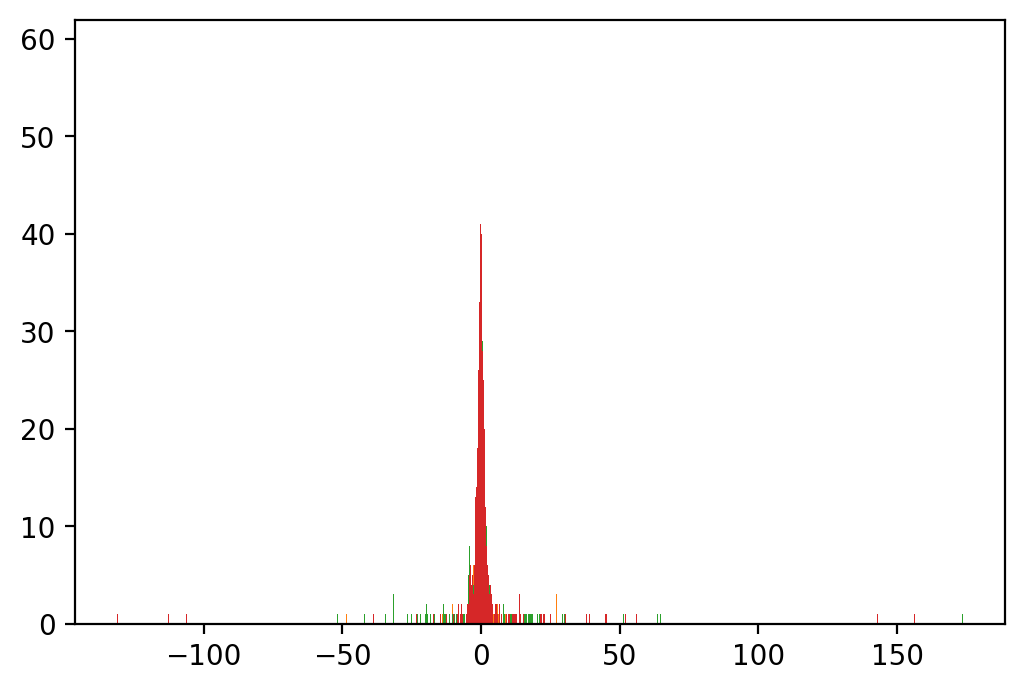

In [56]:
No_of_iterations = [100, 500, 1000, 2000]
data = {'nu':1.0, 'mu':0.0, 'sigma':1.0}


for iteration in No_of_iterations:
    sampling_student = model_student.sampling(data=data, iter=iteration, chains=1, seed=11062020)
    student_results = sampling_student.extract()
    Visualization = plt.hist(student_results['wyjscie'], bins=iteration)
    print("Nuber of Iterations: {iteration_number}\n\
    Summary: {stan_summary}\n\n\
    ----------------------------------------------------------------------------------\
    \n\n".format(iteration_number = iteration, stan_summary = sampling_student.stansummary()))


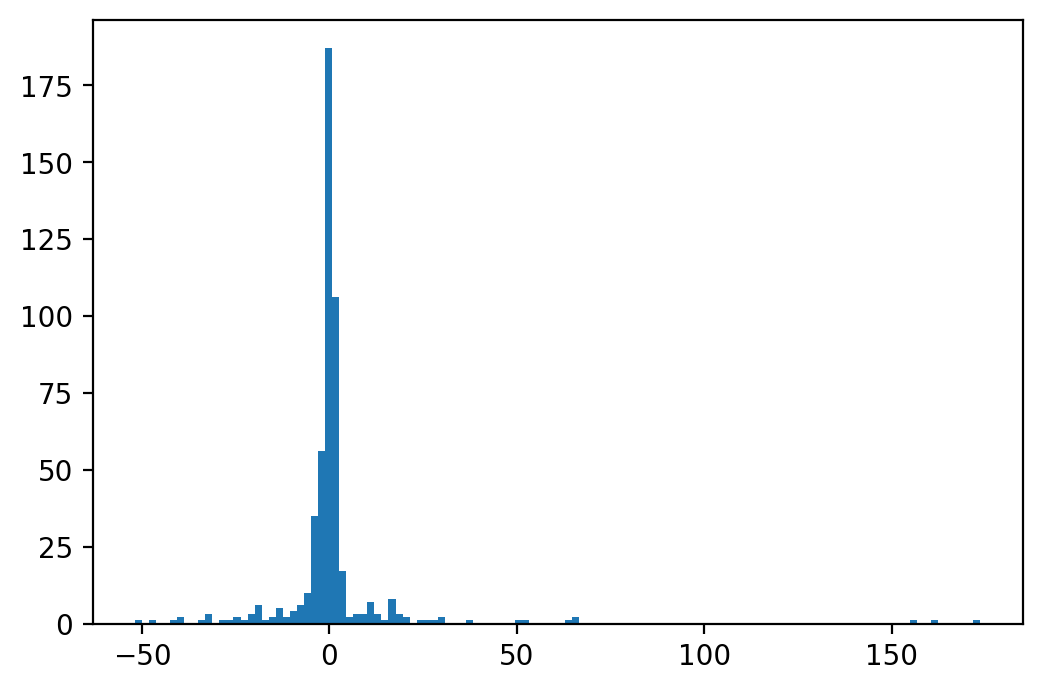

In [61]:

iteration = 1000
data = {'nu':1.0, 'mu':0.0, 'sigma':1.0}
sampling_student = model_student.sampling(data=data, iter=iteration, chains=1, seed=11062020)
student_results = sampling_student.extract()

Histogram = plt.hist(student_results['wyjscie'], bins=120)

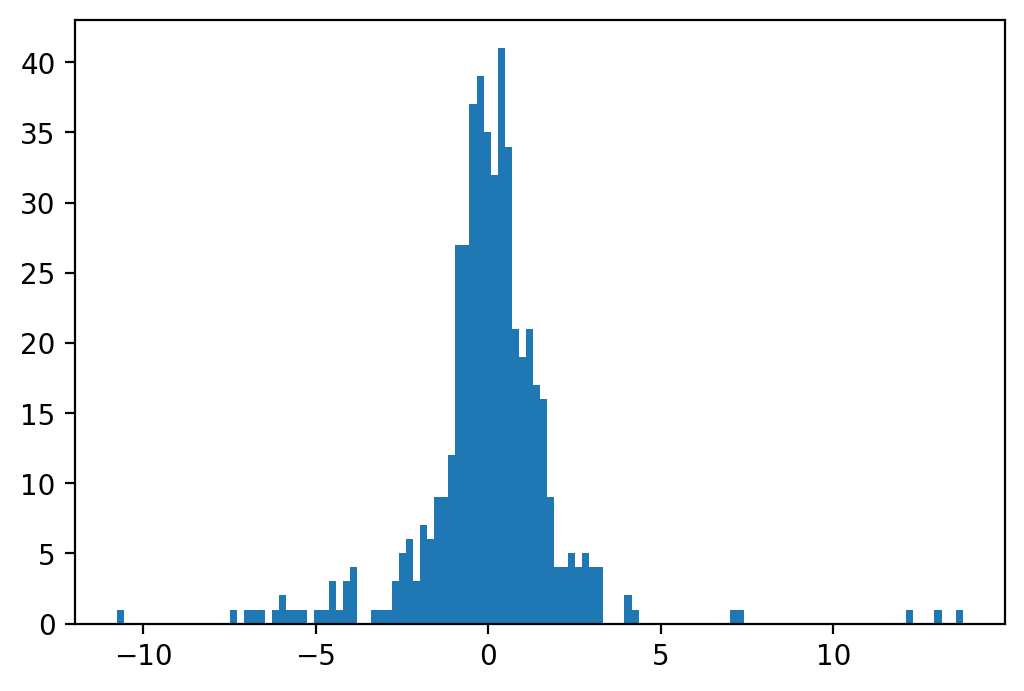

In [62]:

iteration = 1000
data = {'nu':2.0, 'mu':0.0, 'sigma':1.0}
sampling_student = model_student.sampling(data=data, iter=iteration, chains=1, seed=11062020)
student_results = sampling_student.extract()

Histogram = plt.hist(student_results['wyjscie'], bins=120)

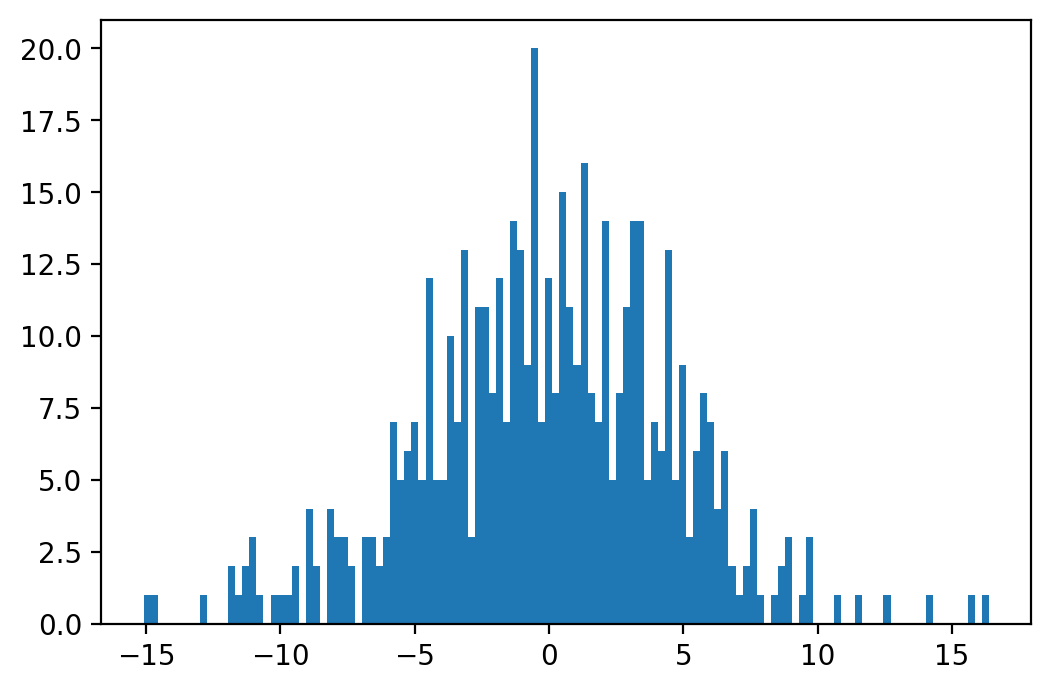

In [63]:

iteration = 1000
data = {'nu':5.0, 'mu':0.0, 'sigma':5.0}
sampling_student = model_student.sampling(data=data, iter=iteration, chains=1, seed=11062020)
student_results = sampling_student.extract()

Histogram = plt.hist(student_results['wyjscie'], bins=120)

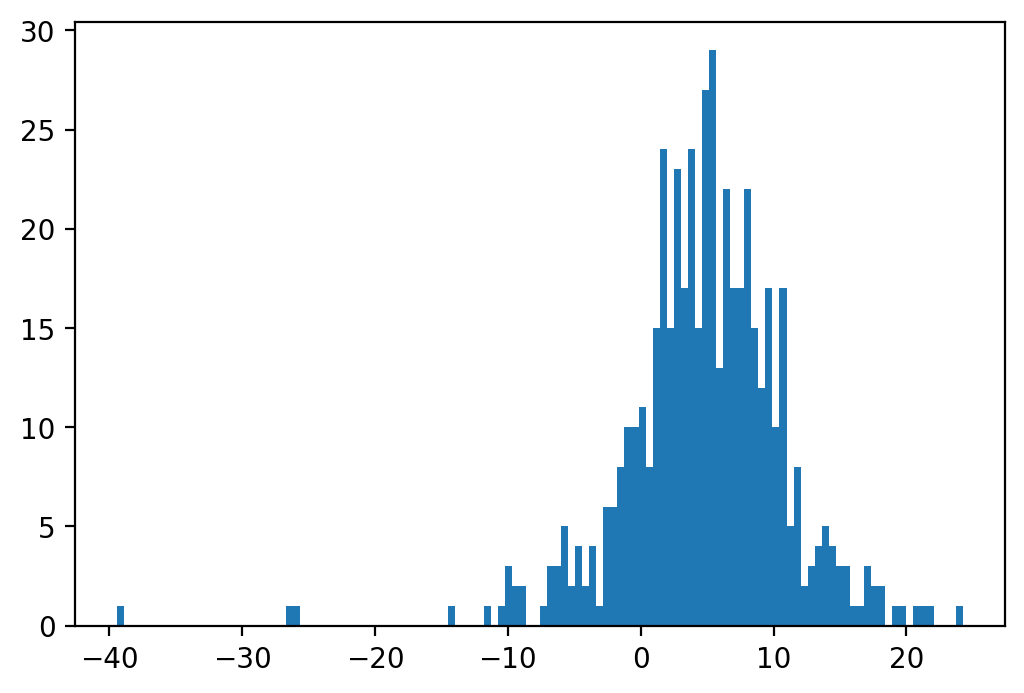

In [65]:

iteration = 1000
data = {'nu':5.0, 'mu':5.0, 'sigma':5.0}
sampling_student = model_student.sampling(data=data, iter=iteration, chains=1, seed=11062020)
student_results = sampling_student.extract()

Histogram = plt.hist(student_results['wyjscie'], bins=120)

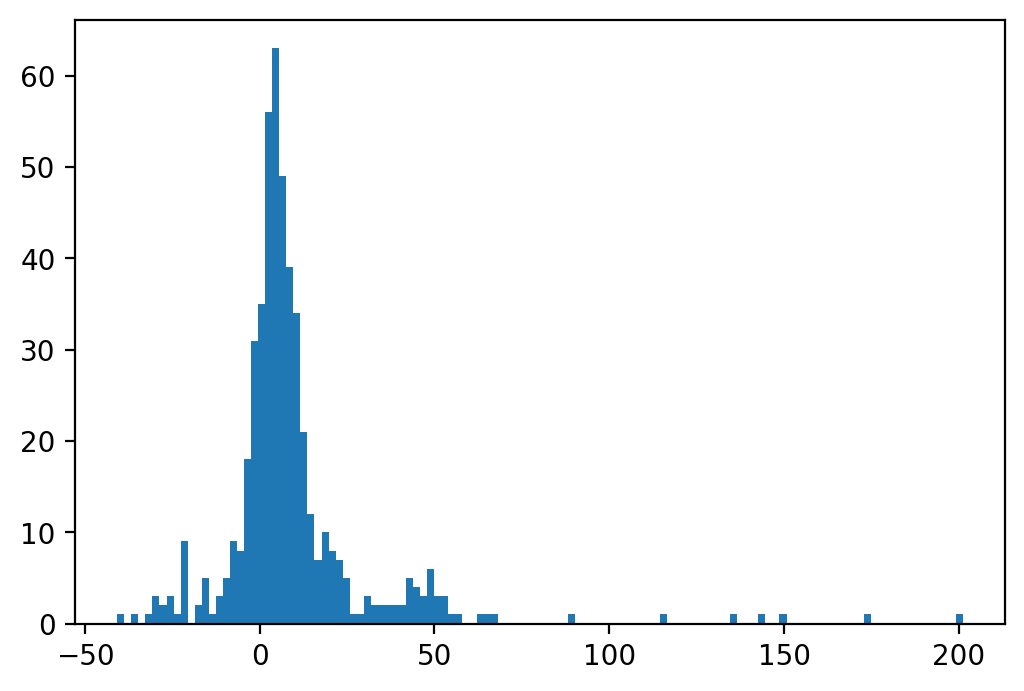

In [74]:

iteration = 1000
data = {'nu':1.0, 'mu':5.0, 'sigma':5.0}
sampling_student = model_student.sampling(data=data, iter=iteration, chains=1, seed=11062020)
student_results = sampling_student.extract()

Histogram = plt.hist(student_results['wyjscie'], bins=120)

In [2]:
# Wartosciowy komentarz:
print(colored("The more samples - the deviation goes higher, mean value is not constant. Degrees of freedom have effect on the mean values.", 'red'))

The more samples - the deviation goes higher, mean value is not constant. Degrees of freedom have effect on the mean values.
